# # Classifiers introduction

In the following program we introduce the basic steps of classification of a dataset in a matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import the package for learning and modeling trees

In [ ]:
from sklearn import tree 

Define the matrix containing the data (one example per row)
and the vector containing the corresponding target value

In [ ]:
X = [[0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1]]
Y = [1, 0, 0, 0, 1, 1]

Declare the classification model you want to use and then fit the model to the data

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Predict the target value (and print it) for the passed data, using the fitted model currently in clf

In [ ]:
print(clf.predict([[0, 1, 1]]))

[0]


In [ ]:
print(clf.predict([[1, 0, 1],[0, 0, 1]]))

[1 0]


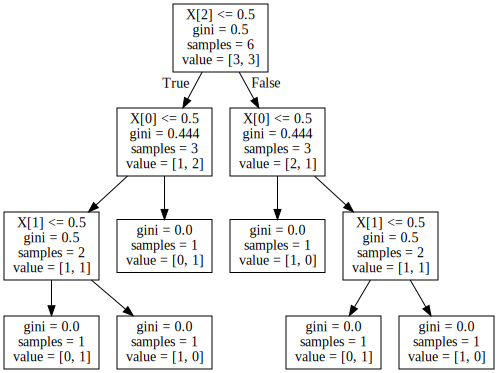

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None)  
graph = graphviz.Source(dot_data)  
graph

In the following we start using a dataset (from UCI Machine Learning repository)

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

# Declare the type of prediction model and the working criteria for the model induction algorithm

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1}) #random_state is used to obtain a deterministic behaviour during fitting

# Split the dataset in training and test set

In [ ]:
# Generate a random permutation of the indices of examples that will be later used 
# for the training and the test set
import numpy as np

print("Numero totale esempi: ", len(iris.data))
np.random.seed(0)
indices = np.random.permutation(len(iris.data))

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10]
indices_test=indices[-10:]

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

Numero totale esempi:  150


# Fit the learning model on training set

In [ ]:
# fit the model to the training data
clf = clf.fit(iris_X_train, iris_y_train)

# Obtain predictions

In [ ]:
# apply fitted model "clf" to the test set 
predicted_y_test = clf.predict(iris_X_test)

# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predicted_y_test)
print("True classes:")
print(iris_y_test) 
print(iris.target_names)

Predictions:
[1 2 1 0 0 0 2 1 2 0]
True classes:
[1 1 1 0 0 0 2 1 2 0]
['setosa' 'versicolor' 'virginica']


Print the index of the test instances and the corresponding predictions

In [ ]:
# print the corresponding instances indexes and class names 
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
Predicted: versicolor	 True: versicolor

Instance # 70: 
Predicted: virginica	 True: versicolor

Instance # 87: 
Predicted: versicolor	 True: versicolor

Instance # 36: 
Predicted: setosa	 True: setosa

Instance # 21: 
Predicted: setosa	 True: setosa

Instance # 9: 
Predicted: setosa	 True: setosa

Instance # 103: 
Predicted: virginica	 True: virginica

Instance # 67: 
Predicted: versicolor	 True: versicolor

Instance # 117: 
Predicted: virginica	 True: virginica

Instance # 47: 
Predicted: setosa	 True: setosa



# Look at the specific examples

In [ ]:
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test)+": ")
    s=""
    for j in range(len(iris.feature_names)): #per ogni esempio di test memorizzo in s i valori delle features che lo descrivono.
        s=s+iris.feature_names[j]+"="+str(iris_X_test[i][j])
        if (j<len(iris.feature_names)-1): s=s+", "
    print(s)
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.6, sepal width (cm)=3.0, petal length (cm)=4.1, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.9, sepal width (cm)=3.2, petal length (cm)=4.8, petal width (cm)=1.8
Predicted: virginica	 True: versicolor

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=6.3, sepal width (cm)=2.3, petal length (cm)=4.4, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.5, sepal width (cm)=3.5, petal length (cm)=1.3, petal width (cm)=0.2
Predicted: setosa	 True: setosa

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.1, sepal width (cm)=3.7, petal length (cm)=1.5, petal width (cm)=0.4
Predicted: setosa	 True: setosa

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=4.9, sepal width (c

# Obtain model performance results

In [ ]:
# print some metrics results
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro') #2 * (precision * recall) / (precision + recall) (macro = Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.)
print("F1 score: "+str(f1))

Accuracy score: 0.9
F1 score: 0.8857142857142858


# Use Cross Validation

In [ ]:
from sklearn.datasets import load_iris #1h:16m
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy

clf = clf.fit(iris.data, iris.target)
print(scores)

[0.96666667 1.         0.86666667 0.86666667 1.        ]


In [ ]:
# computes F1- score
f1_scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')
print(f1_scores)

[0.96658312 1.         0.86111111 0.86666667 1.        ]


# Show the resulting tree 

## 1. Print the picture in a PDF file

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("my_iris_predictions")

'my_iris_predictions.pdf'

## 2. Generate a picture here

In [ ]:
print(list(iris.feature_names))
print(list(iris.target_names))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa', 'versicolor', 'virginica']


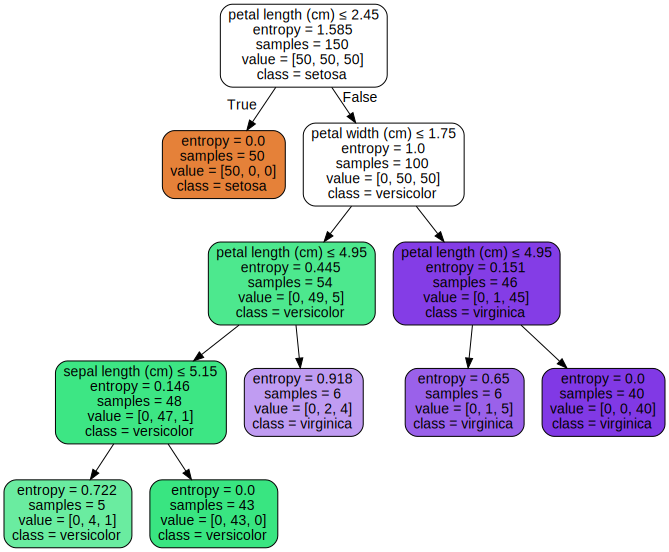

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Your work: what you have to do
Modify the given Jupyter notebook on decision trees on Iris data and perform the following tasks:

1. get an artificial inflation of some class in the training set by a given factor: 10 (weigh more the classes virginica e versicolor which are more difficult to discriminate). Learn the tree in these conditions.
1.b) modify the weight of some classes (set to 10 the weights for misclassification between virginica into versicolor and vice versa) and learn the tree in these conditions. You should obtain similar results as for step 1.
2. learn trees but try to avoid overfitting (by improving the error on the test set) tuning the hyper-parameters on: the minimum number of samples per leaf, max depth of the tree, min_impurity_decrease parameters, max leaf nodes, etc.
3. build the confusion matrix of the created tree models on the test set and show them. 
4. build the ROC curves (or coverage curves in coverage space) and plot them for each tree model you have created: for each model you have to build three curves, one for each class, considered in turn as the positive class.

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

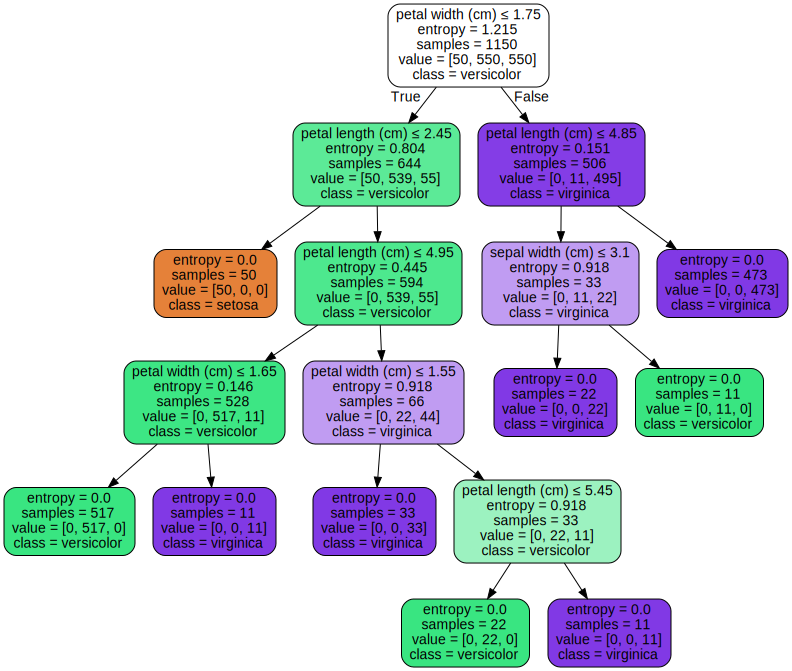

In [ ]:
#Punto 1:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
import graphviz
from sklearn import tree 
from sklearn.model_selection import cross_val_score

#Per ogni esempio di Virginica e Versicolor creo 10 copie diverse:

#print(list(iris.feature_names))
#print(list(iris.target_names))
#print(iris.target)

#print("primo esempio: ", iris.data[0])
#print("target primo esempio: ", iris.target[0])


#print(type(iris.data))


print(iris.data)

print("")

esempi_virginica = iris.data[100:150]
target_virginica = iris.target[100:150]
esempi_versicolor = iris.data[50:100]
target_versicolor = iris.target[50:100]
#print("Esempi virginica: ")
#print(esempi_virginica)

print("")


for i in range(0, 10):
  iris.data = np.concatenate((iris.data, esempi_versicolor), axis=0)
  iris.target = np.concatenate((iris.target, target_versicolor), axis=0)

for i in range(0, 10):
  iris.data = np.concatenate((iris.data, esempi_virginica), axis=0)
  iris.target = np.concatenate((iris.target, target_virginica), axis=0)

print(len(iris.data)) #1150

clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5)
#clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)

clf_Art_inf = clf.fit(iris.data, iris.target)


dot_data = tree.export_graphviz(clf_Art_inf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph







In [ ]:
#2:
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree 
from sklearn.model_selection import cross_val_score

iris = load_iris()

clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:10,2:10}) #random_state is used to obtain a deterministic behaviour during fitting
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)

clf_weights = clf.fit(iris.data, iris.target)




[0.96666667 1.         0.86666667 0.86666667 1.        ]


In [ ]:
#3:
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


'''
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)
'''

iris = load_iris()

esempi_virginica = iris.data[100:150]
target_virginica = iris.target[100:150]
esempi_versicolor = iris.data[50:100]
target_versicolor = iris.target[50:100]
#print("Esempi virginica: ")
#print(esempi_virginica)

#print("")


for i in range(0, 10):
  iris.data = np.concatenate((iris.data, esempi_versicolor), axis=0)
  iris.target = np.concatenate((iris.target, target_versicolor), axis=0)

for i in range(0, 10):
  iris.data = np.concatenate((iris.data, esempi_virginica), axis=0)
  iris.target = np.concatenate((iris.target, target_virginica), axis=0)

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=100)


clf = tree.DecisionTreeClassifier(criterion='entropy',
                       max_depth=7, max_leaf_nodes=2,
                       min_samples_leaf=1, min_samples_split=2) #overfitting

clf.fit(X_train, y_train) 


print (f'Train Accuracy - : {clf.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {clf.score(X_test,y_test):.3f}')
print("")


parameters = {'max_depth' : (3,5,7,9)
              , 'criterion' : ('gini', 'entropy')
              , 'min_samples_leaf' : (5, 6, 10)
              , 'min_samples_split' : (2,4,6)
              , 'min_impurity_decrease' : (0.2, 0.3, 0.5) 
              , 'max_leaf_nodes' : (3, 4)
             }

DT_grid  = RandomizedSearchCV(tree.DecisionTreeClassifier(), param_distributions = parameters, cv = 5, verbose = True)

DT_grid.fit(X_train,y_train)

#print(DT_grid.best_estimator_)


DT_Model = tree.DecisionTreeClassifier(criterion='entropy',
                       max_depth=3, max_leaf_nodes=4,
                       min_impurity_decrease=0.2,
                       min_samples_leaf=10, min_samples_split=6,
                      )

DT_Model.fit(X_train,y_train)

predizioni_training = DT_Model.predict(X_train)
predizioni_test = DT_Model.predict(X_test)


print (f'Train Accuracy - : {accuracy_score(y_train, predizioni_training):.3f}') #con parametri ottimali
print (f'Test Accuracy - : {accuracy_score(y_test, predizioni_test):.3f}') #con parametri ottimali



Train Accuracy - : 0.900
Test Accuracy - : 0.898

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Train Accuracy - : 0.945
Test Accuracy - : 0.939


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished



1150


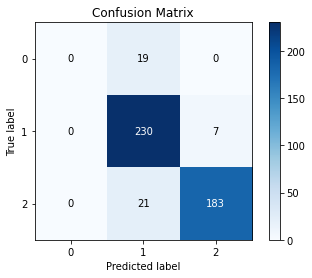

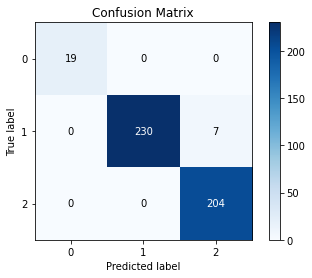

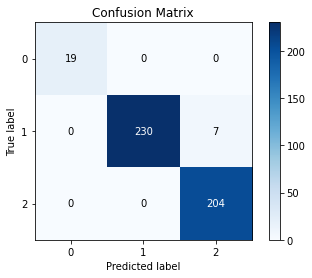

In [ ]:
#4:
from sklearn.metrics import plot_confusion_matrix
!pip install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

iris = load_iris()

esempi_virginica = iris.data[100:150]
target_virginica = iris.target[100:150]
esempi_versicolor = iris.data[50:100]
target_versicolor = iris.target[50:100]
#print("Esempi virginica: ")
#print(esempi_virginica)

print("")

for i in range(0, 10):
  iris.data = np.concatenate((iris.data, esempi_versicolor), axis=0)
  iris.target = np.concatenate((iris.target, target_versicolor), axis=0)

for i in range(0, 10):
  iris.data = np.concatenate((iris.data, esempi_virginica), axis=0)
  iris.target = np.concatenate((iris.target, target_virginica), axis=0)

print(len(iris.data)) #1150


X_ai = iris.data
y_ai = iris.target

X_train_ai, X_test_ai, y_train_ai, y_test_ai = train_test_split(X_ai, y_ai, test_size=0.40, random_state=100)

clf_art_inf = tree.DecisionTreeClassifier(criterion="entropy",random_state=100,min_samples_leaf=5)
clf_art_inf.fit(X_train_ai, y_train_ai)

predizioni_training_art_inf = clf_art_inf.predict(X_train_ai)
predizioni_test_art_inf = clf_art_inf.predict(X_test_ai)



X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=100)


clf_weights = tree.DecisionTreeClassifier(criterion="entropy",random_state=100,min_samples_leaf=5,class_weight={0:1,1:10,2:10})
clf_weights.fit(X_train, y_train)

predizioni_training_weights = clf_weights.predict(X_train)
predizioni_test_weights = clf_weights.predict(X_test)


clf_minori_performance = tree.DecisionTreeClassifier(criterion='entropy',
                       max_depth=7, max_leaf_nodes=2,
                       min_samples_leaf=1, min_samples_split=2) #overfitting

clf_minori_performance.fit(X_train, y_train) 
predizioni_train_minori_performance = clf_minori_performance.predict(X_train)
predizioni_test_minori_performance = clf_minori_performance.predict(X_test)


matrix_minori_performance = skplt.metrics.plot_confusion_matrix(y_test, predizioni_test_minori_performance) #modello senza pesi
matrix_Art_Inf = skplt.metrics.plot_confusion_matrix(y_test_ai, predizioni_test_art_inf)#weights
matrix_weights = skplt.metrics.plot_confusion_matrix(y_test_ai, predizioni_test_art_inf)#Artificial infletion



plt.show()




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


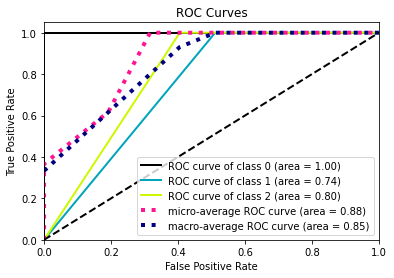

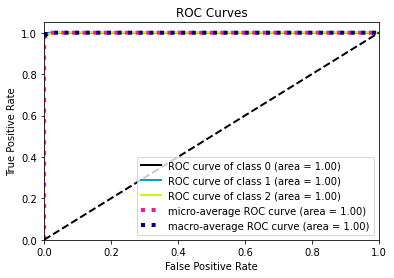

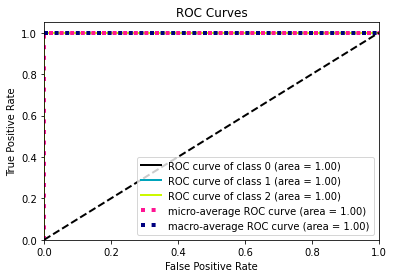

In [ ]:
#5:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn import metrics

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=100)


'''
tree = DecisionTreeClassifier(max_depth=3, random_state=42)

tree.fit(X_train,y_train)

y_pred = tree.predict(X_test)
y_pred_proba = tree.predict_proba(X_test)


#print(y_pred)
#print(y_pred_proba)

#roc_auc_score(y_test, y_pred_proba, multi_class="ovr")
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()
'''




clf_minori_performance.fit(X_train, y_train) 

predizioni_test_minori_performance = clf_minori_performance.predict_proba(X_test)
predizioni_test_art_inf = clf_art_inf.predict_proba(X_test_ai)
predizioni_test_weights = clf_weights.predict_proba(X_test)


skplt.metrics.plot_roc_curve(y_test, predizioni_test_minori_performance)
skplt.metrics.plot_roc_curve(y_test_ai, predizioni_test_art_inf )
skplt.metrics.plot_roc_curve(y_test, predizioni_test_weights)


plt.show()

